# Introduction
The data set analyzed in this notebook encompasses health and demographic information from the years 2014-2015, derived from the Global Health Observatory Data. The aim is to explore various aspects of the data and address specific questions regarding missing values, data problems, population characteristics, and regional trends. By examining these factors, i can gain insights into the relationship between socio-demographic factors and health outcomes across different regions. The investigation also includes identifying the country with the lowest and highest percentage of the population under 15 years old. Additionally, i will determine which region exhibits the highest percentage of their population over 60, shedding light on the age distribution patterns across different regions. Moreover, we will explore the relationship between income and fertility, examining whether fertility rates decrease as income increases, Lastly, we will create appropriate graphs to visually represent the relationship between literacy and life expectancy, both for different regions and specifically for African countries. 


# Data processing

In [1]:
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.font_manager as fm

on the below line i'm going to set my font-weight as a globlal varial varial so i can access it anytime i want to use it

In [2]:
font_weight = fm.FontProperties(weight='bold')

This is where i load the data and preview the first 10 rows on the data so i can have a better picture of the data that i'm handling 

In [3]:
data = pd.read_csv("../data/raw_data.csv") 
data.head(10)

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2
5,Antigua and Barbuda,Americas,89,25.96,12.35,2.12,75,9.9,196.41,99.0,17900.0,91.1,84.5
6,Argentina,Americas,41087,24.42,14.97,2.20,76,14.2,134.92,97.8,17130.0,NaN,NaN
7,Armenia,Europe,2969,20.34,14.06,1.74,71,16.4,103.57,99.6,6100.0,NaN,NaN
8,Australia,Western Pacific,23050,18.95,19.46,1.89,82,4.9,108.34,NaN,38110.0,96.9,97.5
9,Austria,Europe,8464,14.51,23.52,1.44,81,4.0,154.78,NaN,42050.0,NaN,NaN


Below i'm going to display the information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

On the line below i'm going to display the statistical summary of the dataset

In [5]:
data_description = data.describe()
data_description

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
mean,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+05,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+04,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


Below i'm going to begin some exploratory data analysis, i will start by checking out missing data or missing value on the data, Dealing with missing values is a critical step in the analysis process, as it can impact the accuracy and validity of the results. i will use a statistical formula to sum up all the missing values per column on my data set and view them

In [6]:
data.isnull().sum().sort_values(ascending=False)

PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
LiteracyRate                     91
GNI                              32
FertilityRate                    11
CellularSubscribers              10
Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
LifeExpectancy                    0
ChildMortality                    0
dtype: int64

Above I have found that there are missing values on the data. below i'm going to use statistical methods to deal with the missing value.i will use the the average values to impute based on the column, I'm going to replace the missing value with the mean value because it's the average and it's not going to affect our data distribution after replacing missing values with mean value.

Below I'm going to calculate the median for each region for the columns with missing values

In [7]:
region_medians = data.groupby('Region').median()

Below I'm going to fill NaN values with the respective region's median value

In [8]:
data['LiteracyRate'] = data.apply(lambda row: region_medians.loc[row['Region']]['LiteracyRate'] if pd.isna(row['LiteracyRate']) else row['LiteracyRate'], axis=1)
data['PrimarySchoolEnrollmentMale'] = data.apply(lambda row: region_medians.loc[row['Region']]['PrimarySchoolEnrollmentMale'] if pd.isna(row['PrimarySchoolEnrollmentMale']) else row['PrimarySchoolEnrollmentMale'], axis=1)
data['PrimarySchoolEnrollmentFemale'] = data.apply(lambda row: region_medians.loc[row['Region']]['PrimarySchoolEnrollmentFemale'] if pd.isna(row['PrimarySchoolEnrollmentFemale']) else row['PrimarySchoolEnrollmentFemale'], axis=1)

Below I'm going to Calculate the median for the 'GNI' and 'FertilityRate' columns for each region

In [9]:
region_gni_medians = data.groupby('Region')['GNI'].median()
region_fertility_medians = data.groupby('Region')['FertilityRate'].median()

Below I'm going to fill NaN values in 'GNI' and 'FertilityRate' with the respective region's median value

In [10]:
data['GNI'] = data.apply(lambda row: region_gni_medians.loc[row['Region']] if pd.isna(row['GNI']) else row['GNI'], axis=1)
data['FertilityRate'] = data.apply(lambda row: region_fertility_medians.loc[row['Region']] if pd.isna(row['FertilityRate']) else row['FertilityRate'], axis=1)

Below I'm going to alculate the median for the 'CellularSubscribers' column

In [11]:
cellular_subscribers_median = data['CellularSubscribers'].median()

Below I'm going to fill NaN values in 'CellularSubscribers' with the median of the column

In [12]:
data['CellularSubscribers'] = data['CellularSubscribers'].fillna(cellular_subscribers_median)

Below I'm going to check if I still have missing values on my data after replacing all the missing values with a mean value. I replaced the missing value with the mean value just because this is an approximation which can add variance to the data set.

In [13]:
data.isnull().sum().sort_values(ascending=False)

Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64

below i'm going to check id i have duplicate on my data

In [14]:
data.duplicated().sum()

0

Above I have done more data exploration to check if there are any more problems with the data and no other problems have been detected on the data.

# Exploratory data analysis

1. Here I check which country has the lowest % of their population under 15.

In [15]:
lowest_under15_country = data[data['Under15'] == data['Under15'].min()]
print("Country with the lowest of population under 15%:")
lowest_under15_country

Country with the lowest of population under 15%:


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,94.3,35330.0,97.6,97.5


Above I have found that Japan has the lowest percentage of population under 15.

Below I'm going to check which country has the highest % of their population under 15.

In [16]:
highest_under15_country = data[data['Under15'] == data['Under15'].max()]
print("Country with the highest % of population under 15:")
highest_under15_country

Country with the highest % of population under 15:


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
123,Niger,Africa,17157,49.99,4.26,7.58,56,113.5,29.52,70.6,720.0,64.2,52.0


Above I have found that Niger has the highest percentage of population under 15.

2. Below I'm going to check which region has the highest % of population over 60.
First I'm going to Calculate the average percentage of population over 60 for each region then Create a table to represent the 'Percentage of Population Over 60 by Region'

In [17]:
region_avg_over60 = data.groupby('Region')['Over60'].mean()
region_avg_over60 = region_avg_over60.round(2)
region_avg_over60_sorted = region_avg_over60.sort_values()
table_data = {
    'Region': region_avg_over60.index,
    'Average Percentage of Population Over 60': region_avg_over60_sorted.values
}
over60_table = pd.DataFrame(table_data)

print("Percentage of Population Over 60 by Region:")
over60_table

Percentage of Population Over 60 by Region:


,Region,Average Percentage of Population Over 60
0,Africa,5.22
1,Americas,5.62
2,Eastern Mediterranean,8.77
3,Europe,10.16
4,South-East Asia,10.94
5,Western Pacific,19.77


Based on the analysis above, it has been identified that the Western Pacific region has the highest percentage of their population aged over 60.

3. Let's continue finding the regions with the lowest literacy rates?
Below i'm going to calculate the average literacy rate for each region
then create a table to represent the 'Average Literacy Rate by Region'

In [18]:
region_avg_literacy = data.groupby('Region')['LiteracyRate'].mean()
region_avg_literacy = region_avg_literacy.round(2)
region_avg_literacy_sorted = region_avg_literacy.sort_values()

table_data = {
    'Region': region_avg_literacy.index,
    'Average Literacy Rate': region_avg_literacy_sorted.values
}
literacy_rate_table = pd.DataFrame(table_data)

print("Average Literacy Rate by Region:")
literacy_rate_table

Average Literacy Rate by Region:


,Region,Average Literacy Rate
0,Africa,65.52
1,Americas,69.42
2,Eastern Mediterranean,83.87
3,Europe,92.91
4,South-East Asia,93.19
5,Western Pacific,98.99


After doing the observation above i found that South-East Asia has the lowest literacy rates then followed by Africa

4.Let's continue finding a Regions with the lowest child mortality rates?
Below i'm going to Calculate the average child mortality rate for each region first then Create a table to represent the 'Average Child Mortality Rate by Region'.

In [19]:
region_avg_child_mortality = data.groupby('Region')['ChildMortality'].mean()
region_avg_child_mortality = region_avg_child_mortality.round(2)
region_avg_child_mortality_sorted = region_avg_child_mortality.sort_values()

table_data = {
    'Region': region_avg_child_mortality.index,
    'Average Child Mortality Rate': region_avg_child_mortality_sorted.values
}
child_mortality_table = pd.DataFrame(table_data)

print("Average Child Mortality Rate by Region:")
child_mortality_table

Average Child Mortality Rate by Region:


,Region,Average Child Mortality Rate
0,Africa,10.05
1,Americas,19.32
2,Eastern Mediterranean,24.71
3,Europe,35.05
4,South-East Asia,40.25
5,Western Pacific,84.04


After doing the observation above I found that Europe has the lowest child mortality rate followed by the Americas.

5.Below I'm going to calculate the average life expectancy for each region first then create a table to represent the 'Average Life Expectancy by Region'.

In [20]:
region_avg_life_expectancy = data.groupby('Region')['LifeExpectancy'].mean()
region_avg_life_expectancy = region_avg_life_expectancy.round()
region_avg_life_expectancy_sorted = region_avg_life_expectancy.sort_values()

 
table_data = {
    'Region': region_avg_life_expectancy.index,
    'Average Life Expectancy': region_avg_life_expectancy_sorted.values
}
life_expectancy_table = pd.DataFrame(table_data)

print("Average Life Expectancy by Region:")
life_expectancy_table

Average Life Expectancy by Region:


,Region,Average Life Expectancy
0,Africa,58.0
1,Americas,69.0
2,Eastern Mediterranean,70.0
3,Europe,72.0
4,South-East Asia,74.0
5,Western Pacific,77.0


After visualizing the above, I found that people from Africa have a low range of life expectancy and people from other regions have a high range of life expectancy but Europe is the region with a high range of life expectancy above all the regions.

6.Below i'm going to create a box-and-whisker plot to visualize the distribution of child mortality rates across different regions

<Figure size 720x432 with 0 Axes>

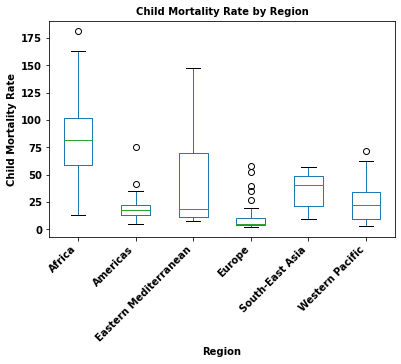

In [21]:
plt.figure(figsize=(10, 6))
data.boxplot(column='ChildMortality', by='Region', grid=False)
plt.xlabel('Region',fontproperties=font_weight)
plt.ylabel('Child Mortality Rate',fontproperties=font_weight)
plt.title('Child Mortality Rate by Region',fontproperties=font_weight)
plt.xticks(rotation=45, ha='right')
plt.xticks(fontproperties=font_weight)
plt.yticks(fontproperties=font_weight)
plt.suptitle('')
plt.show()

7.Below i'm going to visualize and investigate the relationships between life expectancy and wealth across different regions, as well as the relationship between wealth and fertility across different regions, i'm going create scatter plots to visualize these associations, and examine these relationships specifically for African countries to see if the patterns hold in that region.

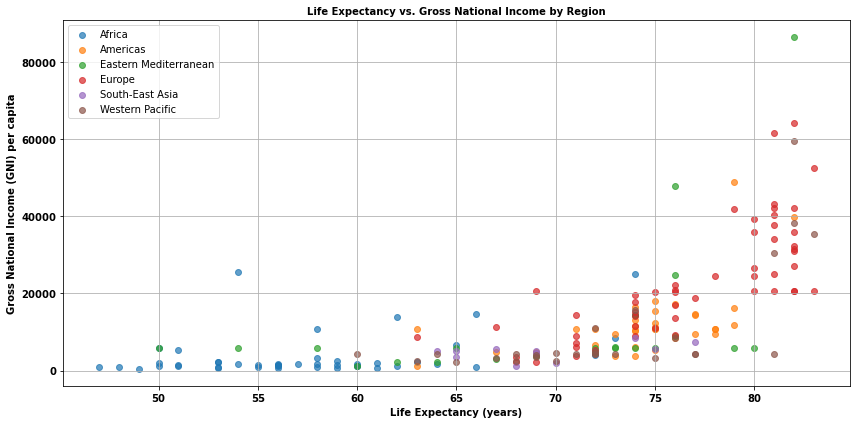

In [22]:
plt.figure(figsize=(12, 6))
for region, group in data.groupby('Region'):
    plt.scatter(group['LifeExpectancy'], group['GNI'], label=region, alpha=0.7)
plt.xlabel('Life Expectancy (years)', fontproperties=font_weight)
plt.ylabel('Gross National Income (GNI) per capita', fontproperties=font_weight)
plt.xticks(fontproperties=font_weight)
plt.yticks(fontproperties=font_weight)
plt.title('Life Expectancy vs. Gross National Income by Region', fontproperties=font_weight)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Upon analyzing the data in Life Expectancy vs Gross Nation Income graph, there is a weak positive correlation between life expectancy and Gross National Income across different regions. Higher-income countries tend to have higher life expectancy. However, there is some variation within regions, indicating that other factors may also play a role in life expectancy. 

looking at the Fertility Rate vs. gross National Income graph, there is a negative correlation between the fertility rate and Gross National Income. Higher-income countries tend to have lower fertility rates. However, as with life expectancy, there is variation within regions, suggesting that other factors influence fertility rates.

when it comes to African countries, I found that there is a weak positive correlation between Gross National Income and life expectancy, and a weak negative correlation between Gross National Income and fertility rate, indicating that these relationships hold for African countries as well.


8.Below I'm going to investigate the relationship between fertility and income by creating a scatter plot to visualize how these two variables are related. Additionally, I'm going to calculate the correlation coefficient to quantify the strength and direction of the relationship and see if fertility decreases as income increases?

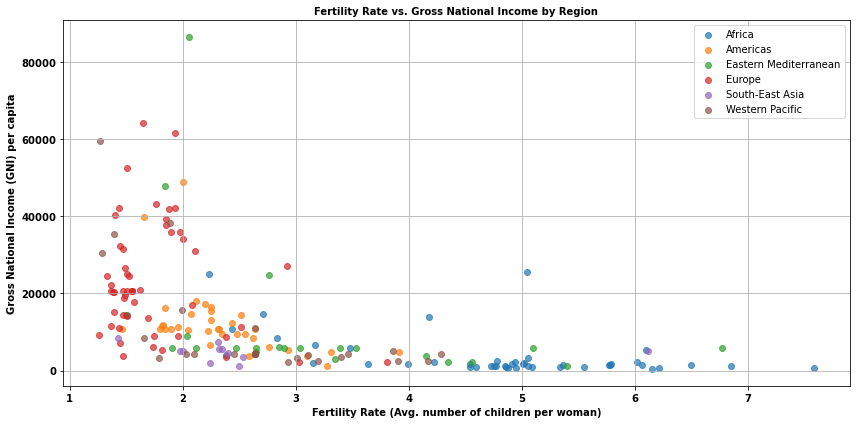

In [23]:
plt.figure(figsize=(12, 6))
for region, group in data.groupby('Region'):
    plt.scatter(group['FertilityRate'], group['GNI'], label=region, alpha=0.7)
plt.xlabel('Fertility Rate (Avg. number of children per woman)', fontproperties=font_weight)
plt.ylabel('Gross National Income (GNI) per capita', fontproperties=font_weight)
plt.title('Fertility Rate vs. Gross National Income by Region', fontproperties=font_weight)
plt.xticks(fontproperties=font_weight)
plt.yticks(fontproperties=font_weight)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Yes, as income increases fertility decreases as we can see from the above analysis that we have a strong negative correlation,Yes,there are few counties that don't seem to follow this trend.

9.Below I continued visualizing some more of the data to check Life expectancy across different regions,I'm going to create a box-and-whisker plot to visualize the distribution of life expectancy across different regions

<Figure size 720x432 with 0 Axes>

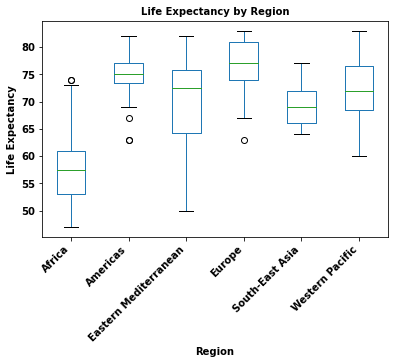

In [24]:
plt.figure(figsize=(10, 6))
data.boxplot(column='LifeExpectancy', by='Region', grid=False)
plt.xlabel('Region',fontproperties=font_weight)
plt.xticks(fontproperties=font_weight)
plt.ylabel('Life Expectancy',fontproperties=font_weight)
plt.yticks(fontproperties=font_weight)
plt.title('Life Expectancy by Region',fontproperties=font_weight)
plt.xticks(rotation=45, ha='right')
plt.suptitle('') 
plt.show()

10. Below i'm going to create the scatter plots to explore the relationship between literacy rate and life expectancy

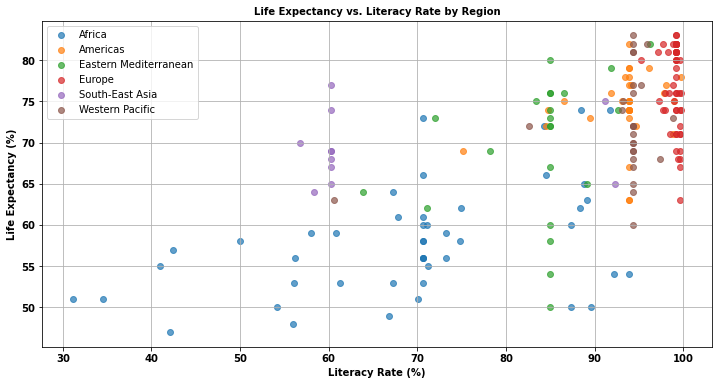

In [25]:
plt.figure(figsize=(12, 6))
for region, group in data.groupby('Region'):
    plt.scatter(group['LiteracyRate'], group['LifeExpectancy'], label=region, alpha=0.7)
plt.xlabel('Literacy Rate (%)',fontproperties=font_weight)
plt.ylabel('Life Expectancy (%)',fontproperties=font_weight)
plt.xticks(fontproperties=font_weight)
plt.yticks(fontproperties=font_weight)
plt.title('Life Expectancy vs. Literacy Rate by Region',fontproperties=font_weight)
plt.grid(True)
plt.legend()
plt.show()

11.Below i'm going to create the scatter plot specifically for African countries

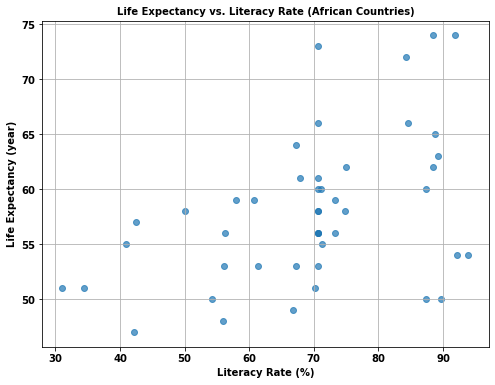

In [26]:
african_data = data[data['Region'] == 'Africa']

plt.figure(figsize=(8, 6))
plt.scatter(african_data['LiteracyRate'], african_data['LifeExpectancy'], alpha=0.7)
plt.xlabel('Literacy Rate (%)',fontproperties=font_weight)
plt.ylabel('Life Expectancy (year)',fontproperties=font_weight)
plt.xticks(fontproperties=font_weight)
plt.yticks(fontproperties=font_weight)
plt.title('Life Expectancy vs. Literacy Rate (African Countries)',fontproperties=font_weight)
plt.grid(True)
plt.show()

upon analyzing the scatter plot in the Life Expectancy vs Literacy Rate by Region, we can observe a weak positive correlation, indicating that regions with higher literacy rates tend to have higher life expectancies. However, there is some variability within regions, suggesting that other factors also influence life expectancy

additionally, looking at Life Expectancy vs Literacy Rate for African Countries scatter plot, The scatter plot for African countries also shows a weak positive correlation between literacy rate and life expectancy. African countries with higher literacy rates tend to have higher life expectancies. However, there are variations among the data points, indicating that factors other than literacy may also affect life expectancy.

# Conclusion 

From the life expectancy across different regions box plot above, we can conclude that people from other regions live much longer than people from africa and people from europe are the one's with high life Expectancy across all the region. Europe has a low median value, Looking at the relationship between fertility and income, we can see that we have a negative correlation as the graph shows that when income increases fertility rate decreases.